In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
ds=pd.read_csv('weather_data.csv')
ds

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,26.0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,1
1,2006-04-01 01:00:00.000 +0200,1,26.0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,1
2,2006-04-01 02:00:00.000 +0200,2,26.0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,1
3,2006-04-01 03:00:00.000 +0200,1,26.0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,1
4,2006-04-01 04:00:00.000 +0200,2,26.0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96376,2016-09-09 19:00:00.000 +0200,1,26.0,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,1
96377,2016-09-09 20:00:00.000 +0200,1,26.0,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,1
96378,2016-09-09 21:00:00.000 +0200,1,26.0,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,1
96379,2016-09-09 22:00:00.000 +0200,1,26.0,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,1


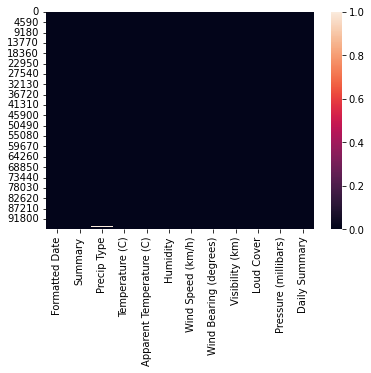

In [42]:
sns.heatmap(ds.isnull())
ds1=ds.dropna()

<AxesSubplot:>

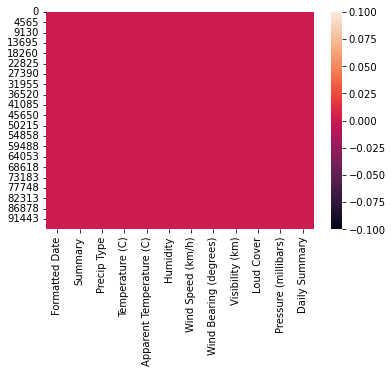

In [43]:
sns.heatmap(ds1.isnull())

In [44]:
#predict
#x=ds1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']].values #iloc[:,:-1].values
#y=ds1['RainTomorrow'].values

#weather_data.csv
x=ds1[['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']].values
y=ds1['Daily Summary'].values


#seattle-weather.csv
#x=ds1[['precipitation','temp_max','temp_min','wind']].values 
#y=ds1['weather'].values

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [46]:
print("no of rows,column",x.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

no of rows,column (95864, 10)
x_train (67104, 10)
x_test (28760, 10)
y_train (67104,)
y_test (28760,)


In [47]:
x_train

array([[ 1.00000000e+00,  2.60000000e+01,  1.79777778e+01, ...,
         1.10285000e+01,  0.00000000e+00,  1.01543000e+03],
       [ 2.00000000e+00,  2.80000000e+01, -7.00000000e+00, ...,
         1.42163000e+01,  0.00000000e+00,  1.03680000e+03],
       [ 2.00000000e+00,  2.60000000e+01,  1.21777778e+01, ...,
         9.98200000e+00,  0.00000000e+00,  1.02174000e+03],
       ...,
       [ 1.00000000e+00,  2.60000000e+01,  1.32444444e+01, ...,
         1.51823000e+01,  0.00000000e+00,  1.02034000e+03],
       [ 1.00000000e+00,  2.60000000e+01,  1.71722222e+01, ...,
         4.02500000e+00,  0.00000000e+00,  1.01815000e+03],
       [ 3.00000000e+00,  2.60000000e+01,  2.22222222e+00, ...,
         1.00464000e+01,  0.00000000e+00,  1.03166000e+03]])

In [48]:
y_train

array([2, 6, 6, ..., 2, 8, 7], dtype=int64)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()#n_neighbors=5)

In [50]:
knn.fit(x_train,y_train)
knn.score(x_test, y_test)*100

39.38803894297636

In [51]:
y_predict=knn.predict(x_test)

In [52]:
y_test=y_test.reshape(-1,1)
y_pred=y_predict.reshape(-1,1)

In [53]:
y_pred=y_predict.reshape(-1,1)
df=np.concatenate((y_test,y_pred),axis=1)
dataframe=pd.DataFrame(df,columns=['current weather','prediction of weather'])

In [54]:
dataframe

,current weather,prediction of weather
0,1,2
1,6,1
2,1,1
3,5,1
4,2,2
...,...,...
28755,2,2
28756,1,1
28757,2,2
28758,9,1


In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [56]:
cm=confusion_matrix(y_test,y_predict)

Text(33.0, 0.5, 'true')

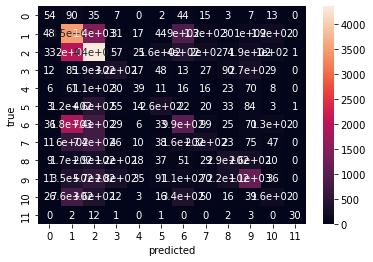

In [57]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [58]:
#from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#clf = SVC(kernel='linear')

In [59]:
#clf.fit(x_train,y_train)

In [60]:
from sklearn.model_selection import KFold

In [61]:
kf = KFold(n_splits=20)
kf.get_n_splits(x)

20

In [62]:
print(kf)

KFold(n_splits=20, random_state=None, shuffle=False)


In [63]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 4794  4795  4796 ... 95861 95862 95863] TEST: [   0    1    2 ... 4791 4792 4793]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [4794 4795 4796 ... 9585 9586 9587]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [ 9588  9589  9590 ... 14379 14380 14381]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [14382 14383 14384 ... 19173 19174 19175]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [19176 19177 19178 ... 23966 23967 23968]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [23969 23970 23971 ... 28759 28760 28761]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [28762 28763 28764 ... 33552 33553 33554]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [33555 33556 33557 ... 38345 38346 38347]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [38348 38349 38350 ... 43138 43139 43140]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [43141 43142 43143 ... 47931 47932 47933]
TRAIN: [    0     1     2 ... 95861 95862 

In [64]:
score=cross_val_score(knn,x,y,cv=kf)

In [65]:
print("Cross Validation scores are{}".format(score))

Cross Validation scores are[0.24864414 0.2288277  0.24947851 0.27909887 0.33590653 0.28541623
 0.30586272 0.27122888 0.29897768 0.29063217 0.25871062 0.30210724
 0.2985604  0.32881285 0.36490716 0.38597955 0.30774045 0.33215105
 0.34300021 0.41435427]


In [66]:
Avg=score.mean()
Avg

0.3065198617856436